## Import libraries

In [17]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import express as px
import folium
from plotly import graph_objs as go
#import seaborn as sns
import ipywidgets as widgets

## Issues with imports

If having issues with the plotly library or folium library use:  
`!pip install plotly==4.7.1` 

`!pip install folium`

`import folium`

`import ploty.express`

This issues occur because older versions of these libraries don't have the current functionalities.

## Import Data on COVID-19 (coronavirus)

Importing .csv file from [Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data/) repository on GitHub.

For a full variables description consult ([`owid-covid-data-codebook.md`](https://github.com/owid/covid-19-data/tree/master/public/data/owid-covid-data-codebook.md))

In [18]:
data=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


## Analysing gdp per capita and testing

### Data Cleaning and Preparation

In [19]:
# These columns are not necessary in this case
#data = data.drop(columns=['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older','extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'])
#data = data.drop(columns=['date', 'iso_code'])

# Grouping rows based on location
grouped_df = data.groupby(["location"])
grouped_and_summed = grouped_df.last()
data = grouped_and_summed.reset_index()

# Replacing missing values
data.fillna(0, inplace=True)
#data.head()

sorted_country_df = data.sort_values('gdp_per_capita', ascending= False)
sorted_country_df.head(100)

,location,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
156,Qatar,QAT,2020-05-18,32604,1632,15,0,11316.668,566.458,5.206,...,1.307,0.617,116935.600,0.0,176.690,16.52,0.8,26.9,0.000,1.20
116,Luxembourg,LUX,2020-05-18,3945,15,107,3,6302.159,23.963,170.933,...,14.312,9.842,94277.965,0.2,128.275,4.42,20.9,26.0,0.000,4.51
170,Singapore,SGP,2020-05-18,28038,682,22,0,4792.540,116.574,3.760,...,12.922,7.049,85535.383,0.0,92.243,10.99,5.2,28.3,0.000,2.40
29,Brunei,BRN,2020-05-18,141,0,1,0,322.298,0.000,2.286,...,4.591,2.382,71809.251,0.0,201.285,12.79,2.0,30.9,0.000,2.70
95,Ireland,IRL,2020-05-18,24112,64,1543,10,4883.150,12.961,312.488,...,13.928,8.678,67335.293,0.2,126.459,3.28,23.0,25.7,0.000,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Peru,PER,2020-05-18,92273,3732,2648,125,2798.539,113.187,80.311,...,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,0.0,0.000,1.60
129,Mongolia,MNG,2020-05-18,140,4,0,0,42.705,1.220,0.000,...,4.031,2.421,11840.846,0.5,460.043,4.82,5.5,46.5,71.180,7.00
1,Albania,ALB,2020-05-18,946,13,31,0,328.723,4.517,10.772,...,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,0.000,2.89
25,Bosnia and Herzegovina,BIH,2020-05-18,2289,22,132,3,697.692,6.706,40.234,...,16.569,10.711,11713.895,0.2,329.635,10.08,30.2,47.7,97.164,3.50


In [20]:
px.bar(
    sorted_country_df.head(15),
    x = "location",
    y = "gdp_per_capita",
    title= "Top 15 countries with the best GDP per capita", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [21]:
sorted_country_df = data.sort_values('total_tests_per_thousand', ascending= False)
px.bar(
    sorted_country_df.head(15),
    x = "location",
    y = "total_tests_per_thousand",
    title= "Top 15 countries with the highest number of total_tests_per_thousand", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [22]:
sorted_country_df = data.sort_values('gdp_per_capita', ascending= False)

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="gdp_per_capita", y="total_tests_per_thousand", size="total_tests_per_thousand", color="location",
               hover_name="location", size_max=60)
    fig.update_layout(
    title="Top " +str(n) +" richest countries and total_tests_per_thousand",
    xaxis_title="gdp_per_capita",
    yaxis_title="total_tests_per_thousand",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=20)

interactive(children=(IntSlider(value=20, description='n', max=60, min=-20), Output()), _dom_classes=('widget-…

<function __main__.bubble_chart(n)>

## Analysing extreme poverty and total numbers of deaths

In [23]:
sorted_country_df = data.sort_values('extreme_poverty', ascending= False)
px.bar(
    sorted_country_df.head(15),
    x = "location",
    y = "extreme_poverty",
    title= "Top 15 countries with extreme poverty", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [24]:
sorted_country_df = data.sort_values('total_deaths_per_million', ascending= False)
px.bar(
    sorted_country_df.head(15),
    x = "location",
    y = "total_deaths_per_million",
    title= "Top 15 countries with total_deaths_per_million", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [25]:
sorted_country_df = data.sort_values('extreme_poverty', ascending= False)

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="extreme_poverty", y="total_deaths_per_million", size="total_deaths_per_million", color="location",
               hover_name="location", size_max=60)
    fig.update_layout(
    title="Top " +str(n) +" poorest countries and total_deaths_per_million",
    xaxis_title="extreme_poverty",
    yaxis_title="total_deaths_per_million",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=20)

interactive(children=(IntSlider(value=20, description='n', max=60, min=-20), Output()), _dom_classes=('widget-…

<function __main__.bubble_chart(n)>

## Analysing aged_65_older and total_deaths_per_million

In [26]:
sorted_country_df = data.sort_values('total_deaths_per_million', ascending= False)
px.bar(
    sorted_country_df.head(15),
    x = "location",
    y = "total_deaths_per_million",
    title= "Top 15 countries with total_deaths_per_million", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [27]:
sorted_country_df = data.sort_values('aged_65_older', ascending= False)

px.bar(
    sorted_country_df.head(15),
    x = "location",
    y = "aged_65_older",
    title= "Top 15 countries with aged_65_older", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [28]:
sorted_country_df = data.sort_values('aged_65_older', ascending= False)

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="aged_65_older", y="total_deaths_per_million", size="total_deaths_per_million", color="location",
               hover_name="location", size_max=60)
    fig.update_layout(
    title="Top " +str(n) +" aged_65_older and total_deaths_per_million",
    xaxis_title="aged_65_older",
    yaxis_title="total_deaths_per_million",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=20)

interactive(children=(IntSlider(value=20, description='n', max=60, min=-20), Output()), _dom_classes=('widget-…

<function __main__.bubble_chart(n)>

## Evolution of each Country

In [29]:
# New import due to data cleaning done before
data=pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")

List of available countries in the dataset to search for:

In [30]:
grouped_df = data.groupby(["location"])
grouped_and_summed = grouped_df.last()
data1 = grouped_and_summed.reset_index()
data1=data1['location'].tolist()
data1

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 

In [37]:
i = len(data.values.tolist())
data2 = data.sort_values('total_deaths', ascending= True)

def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    x_values=(data2.loc[data2['location'] == country].iloc[:,2]).tolist()
    y_values=(data2.loc[data2['location'] == country].iloc[:,3]).tolist()
    
    fig = go.Figure();
    a=len(x_values)
    x_data=[]
    y_data=[]
    
    
    for i in range (a):
        x_data.append(x_values[i])
        y_data.append(y_values[i])
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        #name=labels[0],
        line=dict(color=colors[0], width=line_size[0]),
        connectgaps=True,
        text = "Total confirmed "+ str(y_values[-1])
        ));
    
    fig.update_layout(
        title="Total COVID 19 cases in " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();

    
interact(plot_cases_of_a_country, country='China')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears


interactive(children=(Text(value='China', description='country'), Output()), _dom_classes=('widget-interact',)…

In [36]:
i = len(data.values.tolist())
data2 = data.sort_values('total_cases', ascending= True)

def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    x_values=(data2.loc[data2['location'] == country].iloc[:,2]).tolist()
    y_values=(data2.loc[data2['location'] == country].iloc[:,5]).tolist()
    
    fig = go.Figure();
    a=len(x_values)
    x_data=[]
    y_data=[]
    
    
    for i in range (a):
        x_data.append(x_values[i])
        y_data.append(y_values[i])
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        #name=labels[0],
        line=dict(color=colors[1], width=line_size[1]),
        connectgaps=True,
        text = "Total dead cases "+ str(y_values[-1])
        ));
    
    fig.update_layout(
        title="Total death COVID 19 cases in " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();

    
interact(plot_cases_of_a_country, country='Portugal')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears


interactive(children=(Text(value='Portugal', description='country'), Output()), _dom_classes=('widget-interact…

## Time Series Forecasting with Parametric Curve Fitting

[Medium Source](https://medium.com/analytics-vidhya/how-to-predict-when-the-covid-19-pandemic-will-stop-in-your-country-with-python-d6fbb2425a9f)

In [48]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For parametric fitting
from scipy import optimize

In [155]:
data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", sep=",")

i = len(data.values.tolist())
data2 = data.sort_values('date', ascending= True)

In [156]:
country="Iceland"
date_of_cases=(data2.loc[data2['location'] == country].iloc[:,2]).tolist()
total_number_of_cases=(data2.loc[data2['location'] == country].iloc[:,3]).tolist()

In [251]:
'''
Linear function: f(x) = a + b*x
'''
def f(x):
    return 13*x

y_linear = f(x=np.arange(len(total_number_of_cases)))
'''
Exponential function: f(x) = a + b^x
'''
def f(x):
    return 1.05535**x

y_exponential = f(x=np.arange(len(total_number_of_cases)))
'''
Logistic function: f(x) = a / (1 + e^(-b*(x-c)))
'''
def f(x): 
    return 1780 / (1 + np.exp(-0.2*(x-88)))

y_logistic = f(x=np.arange(len(total_number_of_cases)))

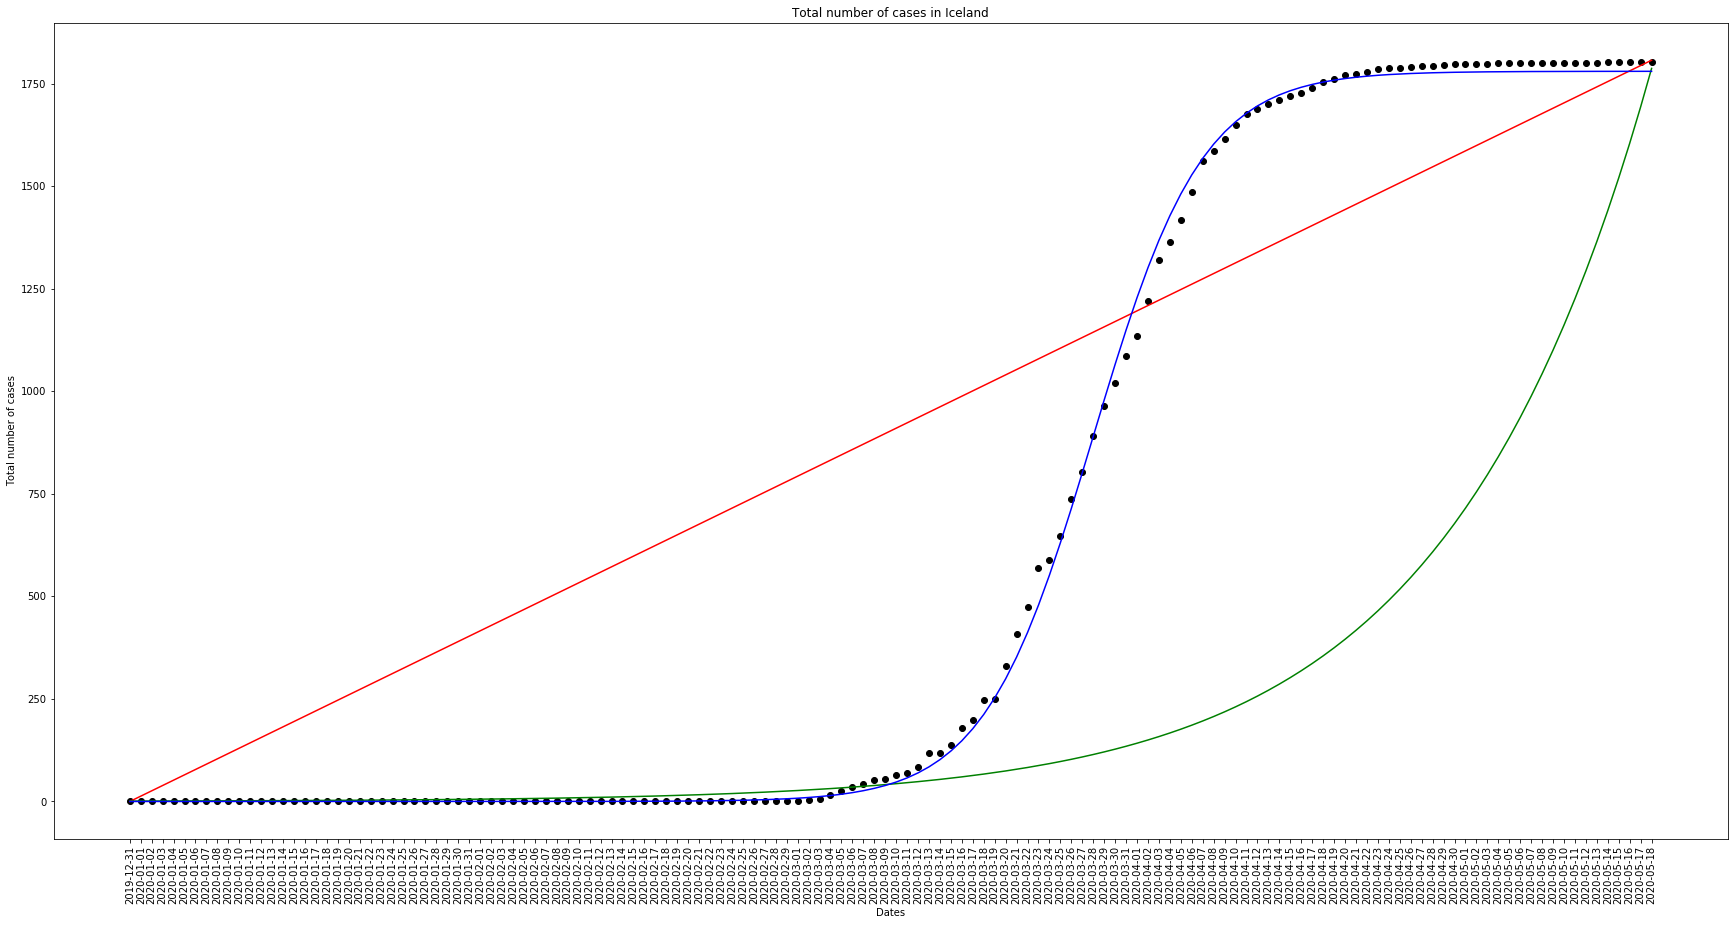

In [252]:
y_values= np.arange(len(date_of_cases))

fig, ax = plt.subplots(figsize=(30,15))

ax.scatter(y_values, total_number_of_cases,color='black')
plt.xticks(y_values, date_of_cases, rotation='vertical')
ax.plot(y_values, y_linear, label="linear", color="red")
ax.plot(y_values, y_exponential, label="exponential", color="green")
ax.plot(y_values, y_logistic, label="logistic", color="blue")
plt.ylabel('Total number of cases')
plt.xlabel('Dates')
plt.title('Total number of cases in '+str(country))
plt.show()

In [254]:
country="Iceland"
date_of_cases=(data2.loc[data2['location'] == country].iloc[:,2]).tolist()
number_of_new_cases=(data2.loc[data2['location'] == country].iloc[:,4]).tolist()

In [310]:
'''
Gaussian function: f(x) = a * e^(-0.5 * ((x-μ)/σ)**2)
'''
def f(x):
    return 100 * np.exp(-0.018 * ((x-90)/2)**2)

y_gaussian = f(x=np.arange(len(number_of_new_cases)))

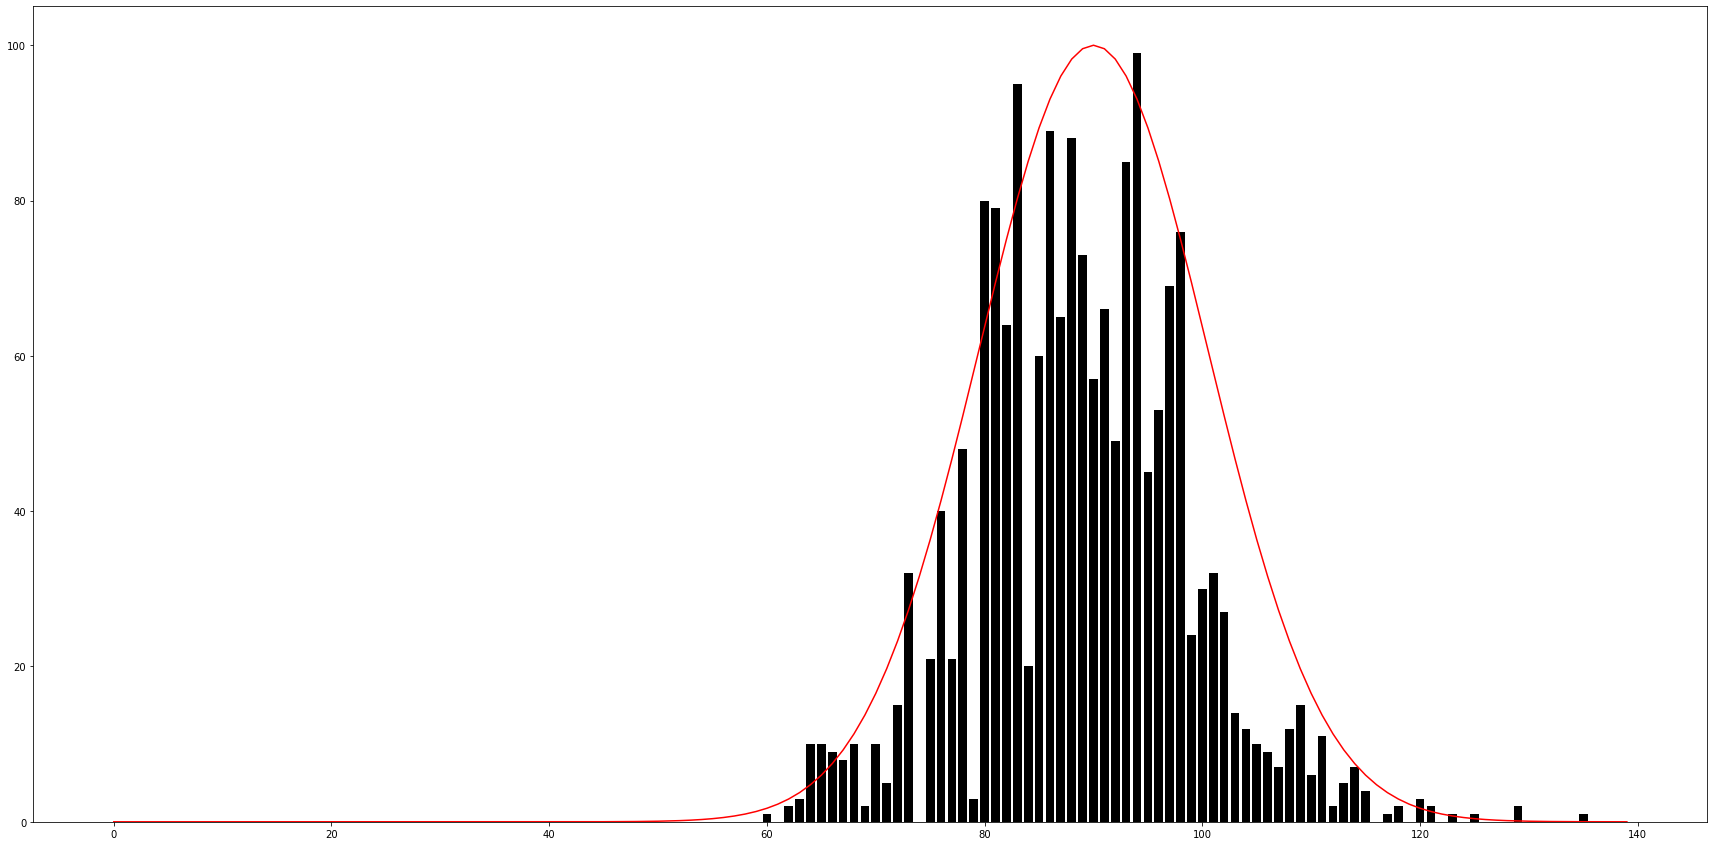

In [311]:
fig, ax = plt.subplots(figsize=(30,15))
ax.bar(y_values,number_of_new_cases, color="black")
ax.plot(y_values, y_gaussian, color="red")
plt.show()

In [318]:
print(len(total_number_of_cases))
print(total_number_of_cases)

140
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 6, 16, 26, 35, 43, 53, 55, 65, 70, 85, 117, 117, 138, 178, 199, 247, 250, 330, 409, 473, 568, 588, 648, 737, 802, 890, 963, 1020, 1086, 1135, 1220, 1319, 1364, 1417, 1486, 1562, 1586, 1616, 1648, 1675, 1689, 1701, 1711, 1720, 1727, 1739, 1754, 1760, 1771, 1773, 1778, 1785, 1789, 1789, 1790, 1792, 1792, 1795, 1797, 1797, 1798, 1798, 1799, 1799, 1799, 1799, 1801, 1801, 1801, 1801, 1801, 1801, 1802, 1802, 1802, 1802, 1802]


## Fiting the model

In [388]:
df = pd.read_csv(open(r'C:\Users\eduar\OneDrive\Ambiente de Trabalho\tpSIG\iceland.csv'))
df.index = df['date']

In [389]:
date= df["date"].tolist()
xvalues = np.arange(len(date))

total_cases= df["total_cases"].tolist()

print(date)
print(total_cases)

[20191231, 20200101, 20200102, 20200103, 20200104, 20200105, 20200106, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200114, 20200115, 20200116, 20200117, 20200118, 20200119, 20200120, 20200121, 20200122, 20200123, 20200124, 20200125, 20200126, 20200127, 20200128, 20200129, 20200130, 20200131, 20200201, 20200202, 20200203, 20200204, 20200205, 20200206, 20200207, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200215, 20200216, 20200217, 20200218, 20200219, 20200220, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200227, 20200228, 20200229, 20200301, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200308, 20200309, 20200310, 20200311, 20200312, 20200313, 20200314, 20200315, 20200316, 20200317, 20200318, 20200319, 20200320, 20200321, 20200322, 20200323, 20200324, 20200325, 20200326, 20200327, 20200328, 20200329, 20200330, 20200331, 20200401, 20200402, 20200403, 20200404, 20200405, 20200406, 20200407, 20200408,

In [390]:
'''
Logistic function: f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def logistic_f(xdata, c, k, m):
    ydata = c / (1 + np.exp(-k*(xdata-m)))
    return ydata
## optimize from scipy
logistic_model, cov = optimize.curve_fit(logistic_f, xdata=xvalues, ydata=total_cases, maxfev=10000, p0=[np.max(total_cases), 1, 1])
## print the parameters
logistic_model

array([1.80232062e+03, 1.76703590e-01, 8.83108229e+01])

## Forecast

In [394]:
'''
Plot parametric fitting.
'''
def utils_plot_parametric(dtf, zoom=30, figsize=(15,5)):
    ## interval
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    dtf["conf_int_low"] = dtf["forecast"] - 1.96*dtf["residuals"].std()
    dtf["conf_int_up"] = dtf["forecast"] + 1.96*dtf["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    
    ## entire series
    dtf["ts"].plot(marker=".", linestyle='None', ax=ax[0], title="Parametric Fitting", color="black")
    dtf["model"].plot(ax=ax[0], color="green")
    dtf["forecast"].plot(ax=ax[0], grid=True, color="red")
    ax[0].fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)
   
    plt.show()
    return dtf[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

In [395]:
'''
Forecast unknown future.
:parameter
    :param ts: pandas series
    :param f: function
    :param model: list of optim params
    :param pred_ahead: number of observations to forecast (ex. pred_ahead=30)
    :param freq: None or str - 'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
    :param zoom: for plotting
'''
def forecast_curve(ts, f, model, pred_ahead=None, zoom=30, figsize=(15,5)):
    ## fit
    X = np.arange(len(ts))
    fitted = f(X, model[0], model[1], model[2])
    dtf = ts.to_frame(name="ts")
    dtf["model"] = fitted
    
    ## index
    start=0
    index = pd.date_range(start=start,periods=pred_ahead)
    index = index[1:]
    ## forecast
    Xnew = np.arange(len(ts)+1, len(ts)+1+len(index))
    preds = f(Xnew, model[0], model[1], model[2])
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    
    ## plot
    utils_plot_parametric(dtf, zoom=zoom)
    return dtf

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

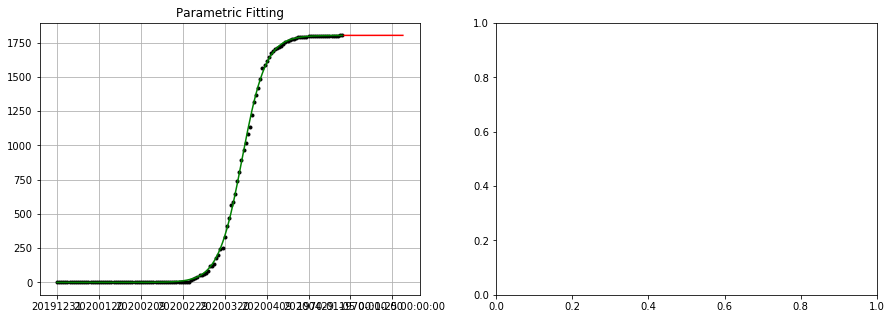

In [396]:
preds = forecast_curve(df['total_cases'].astype(np.float) , logistic_f, logistic_model, pred_ahead=30, zoom=7)